In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [106]:
flights = pd.read_csv('Final_FLights_Cords.csv')
print(flights.shape)

(3000000, 36)


In [107]:
flights.head(20)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,o_latitude,o_longitude,d_latitude,d_longitude
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,1065.0,NaN,NaN,NaN,NaN,NaN,26.072599,-80.152702,40.692501,-74.168701
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,1399.0,NaN,NaN,NaN,NaN,NaN,44.882000,-93.221802,47.449001,-122.308998
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,680.0,NaN,NaN,NaN,NaN,NaN,39.861698,-104.672997,44.882000,-93.221802
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,1589.0,0.0,0.0,24.0,0.0,0.0,44.882000,-93.221802,37.618999,-122.375000
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,985.0,NaN,NaN,NaN,NaN,NaN,28.429399,-81.308998,32.896801,-97.038002
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",...,181.0,141.0,0.0,0.0,0.0,0.0,32.847099,-96.851799,35.393101,-97.600700
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",...,399.0,NaN,NaN,NaN,NaN,NaN,38.852100,-77.037697,42.364300,-71.005203
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",...,613.0,0.0,0.0,23.0,0.0,0.0,34.637199,-86.775101,38.852100,-77.037697
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",...,1379.0,NaN,NaN,NaN,NaN,NaN,29.984400,-95.341400,33.942501,-118.407997
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",...,1533.0,NaN,NaN,NaN,NaN,NaN,47.449001,-122.308998,64.815102,-147.856003


In [108]:
list(flights.columns) 

['FL_DATE',
 'AIRLINE',
 'AIRLINE_DOT',
 'AIRLINE_CODE',
 'DOT_CODE',
 'FL_NUMBER',
 'ORIGIN',
 'ORIGIN_CITY',
 'DEST',
 'DEST_CITY',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'DELAY_DUE_CARRIER',
 'DELAY_DUE_WEATHER',
 'DELAY_DUE_NAS',
 'DELAY_DUE_SECURITY',
 'DELAY_DUE_LATE_AIRCRAFT',
 'o_latitude',
 'o_longitude',
 'd_latitude',
 'd_longitude']

In [109]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 36 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

C:\Users\mamoo\AppData\Local\Temp\ipykernel_1260\413470610.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


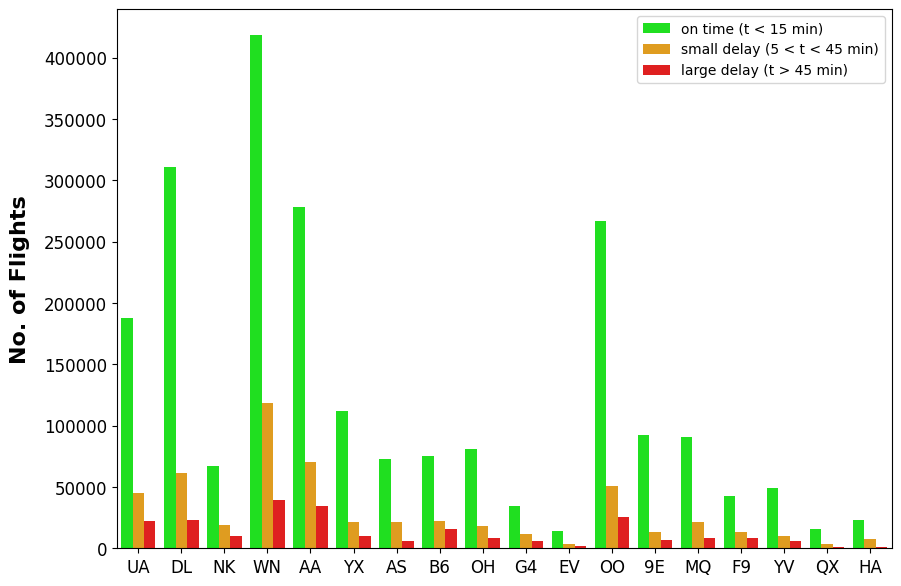

In [110]:
delay_level = lambda x:((0,1)[x > 5],2)[x > 45]
flights['ARR_DELAY_LEVEL'] = flights['ARR_DELAY'].apply(delay_level)

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(x="AIRLINE_CODE", hue='ARR_DELAY_LEVEL', data=flights, palette= ["#00FF00","#FFA500","#FF0000"])

labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
ax.xaxis.label.set_visible(False)
plt.ylabel('No. of Flights', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 15 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

In [111]:
NAs = pd.concat([flights.isnull().sum()], axis = 1, keys = ['flights'])
NAs[NAs.sum(axis=1) > 0]

,flights
DEP_TIME,77615
DEP_DELAY,77644
TAXI_OUT,78806
WHEELS_OFF,78806
WHEELS_ON,79944
TAXI_IN,79944
ARR_TIME,79942
ARR_DELAY,86198
CANCELLATION_CODE,2920860
CRS_ELAPSED_TIME,14


In [112]:
cancelled_flights = flights[flights['CANCELLED'] != 0]
cancelled_flights.info()


<class 'pandas.core.frame.DataFrame'>
Index: 79140 entries, 14 to 2999946
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FL_DATE                  79140 non-null  object 
 1   AIRLINE                  79140 non-null  object 
 2   AIRLINE_DOT              79140 non-null  object 
 3   AIRLINE_CODE             79140 non-null  object 
 4   DOT_CODE                 79140 non-null  int64  
 5   FL_NUMBER                79140 non-null  int64  
 6   ORIGIN                   79140 non-null  object 
 7   ORIGIN_CITY              79140 non-null  object 
 8   DEST                     79140 non-null  object 
 9   DEST_CITY                79140 non-null  object 
 10  CRS_DEP_TIME             79140 non-null  int64  
 11  DEP_TIME                 1525 non-null   float64
 12  DEP_DELAY                1496 non-null   float64
 13  TAXI_OUT                 334 non-null    float64
 14  WHEELS_OFF              

In [113]:
flights = flights.dropna(subset=['ARR_DELAY'])

In [114]:
NAs = pd.concat([flights.isnull().sum()], axis = 1, keys = ['flights'])
NAs[NAs.sum(axis=1) > 0]

,flights
CANCELLATION_CODE,2913802
DELAY_DUE_CARRIER,2379939
DELAY_DUE_WEATHER,2379939
DELAY_DUE_NAS,2379939
DELAY_DUE_SECURITY,2379939
DELAY_DUE_LATE_AIRCRAFT,2379939


In [115]:
flights['FL_DATE'] = pd.to_datetime(flights['FL_DATE'])
flights['Year'] = flights['FL_DATE'].dt.year
flights['Month'] = flights['FL_DATE'].dt.month
flights['Day'] = flights['FL_DATE'].dt.day

In [116]:
print(flights[['FL_DATE', 'Year', 'Month', 'Day']].head())

     FL_DATE  Year  Month  Day
0 2019-01-09  2019      1    9
1 2022-11-19  2022     11   19
2 2022-07-22  2022      7   22
3 2023-03-06  2023      3    6
4 2020-02-23  2020      2   23


In [117]:
columns_to_drop = [ 'FL_NUMBER', 'DOT_CODE', 'AIRLINE_DOT', 'AIRLINE', 'CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME', 'CANCELLED', 'DIVERTED','CANCELLED', 'CRS_ELAPSED_TIME', 'ARR_DELAY_LEVEL','DELAY_DUE_LATE_AIRCRAFT', 'DELAY_DUE_SECURITY', 'DELAY_DUE_NAS', 'DELAY_DUE_WEATHER', 'DELAY_DUE_CARRIER', 'o_latitude', 'o_longitude', 'd_latitude', 'd_longitude', 'ORIGIN_CITY', 'DEST_CITY','CANCELLATION_CODE','Year', 'FL_DATE', 'Month', 'AIR_TIME'  ]
flights1 = flights.drop(columns=columns_to_drop)
flights1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913802 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   AIRLINE_CODE  object 
 1   ORIGIN        object 
 2   DEST          object 
 3   DEP_DELAY     float64
 4   TAXI_OUT      float64
 5   TAXI_IN       float64
 6   ARR_DELAY     float64
 7   ELAPSED_TIME  float64
 8   DISTANCE      float64
 9   Day           int32  
dtypes: float64(6), int32(1), object(3)
memory usage: 233.4+ MB


In [118]:
flights1.head(10)

,AIRLINE_CODE,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,ELAPSED_TIME,DISTANCE,Day
0,UA,FLL,EWR,-4.0,19.0,4.0,-14.0,176.0,1065.0,9
1,DL,MSP,SEA,-6.0,9.0,38.0,-5.0,236.0,1399.0,19
2,UA,DEN,MSP,6.0,20.0,5.0,0.0,112.0,680.0,22
3,DL,MSP,SFO,-1.0,27.0,9.0,24.0,285.0,1589.0,6
4,NK,MCO,DFW,-2.0,15.0,14.0,-1.0,182.0,985.0,23
5,WN,DAL,OKC,147.0,15.0,3.0,141.0,54.0,181.0,31
6,AA,DCA,BOS,-9.0,23.0,8.0,-29.0,89.0,399.0,11
7,YX,HSV,DCA,-6.0,22.0,41.0,23.0,151.0,613.0,8
8,NK,IAH,LAX,-3.0,11.0,8.0,-11.0,219.0,1379.0,12
9,AS,SEA,FAI,-9.0,19.0,3.0,1.0,220.0,1533.0,22


In [119]:
print(flights1.shape)


(2913802, 10)


In [120]:
flights1.isnull().sum()

AIRLINE_CODE    0
ORIGIN          0
DEST            0
DEP_DELAY       0
TAXI_OUT        0
TAXI_IN         0
ARR_DELAY       0
ELAPSED_TIME    0
DISTANCE        0
Day             0
dtype: int64

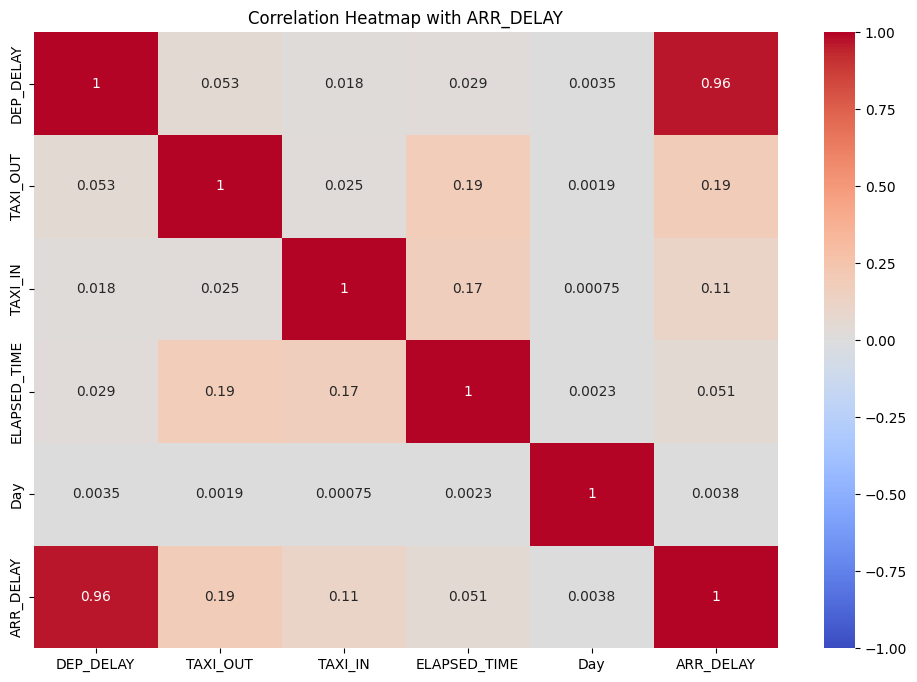

In [122]:
correlation_columns = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME','Day' , 'ARR_DELAY']
correlation_matrix = flights1[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with ARR_DELAY')
plt.show()

In [123]:
flights1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913802 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column        Dtype  
---  ------        -----  
 0   AIRLINE_CODE  object 
 1   ORIGIN        object 
 2   DEST          object 
 3   DEP_DELAY     float64
 4   TAXI_OUT      float64
 5   TAXI_IN       float64
 6   ARR_DELAY     float64
 7   ELAPSED_TIME  float64
 8   DISTANCE      float64
 9   Day           int32  
dtypes: float64(6), int32(1), object(3)
memory usage: 233.4+ MB


In [126]:
categorical_features = ['ORIGIN', 'DEST']
numerical_features = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME', 'DISTANCE', 'Day']

In [127]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

In [129]:
X = flights1[['AIRLINE_CODE', 'ORIGIN', 'DEST', 'DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ELAPSED_TIME', 'DISTANCE', 'Day']]
y = flights1['ARR_DELAY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [130]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MAE: 5.185638028186164
MSE: 46.36993966371775
RMSE: 6.809547684223802
R2: 0.9821667598944627


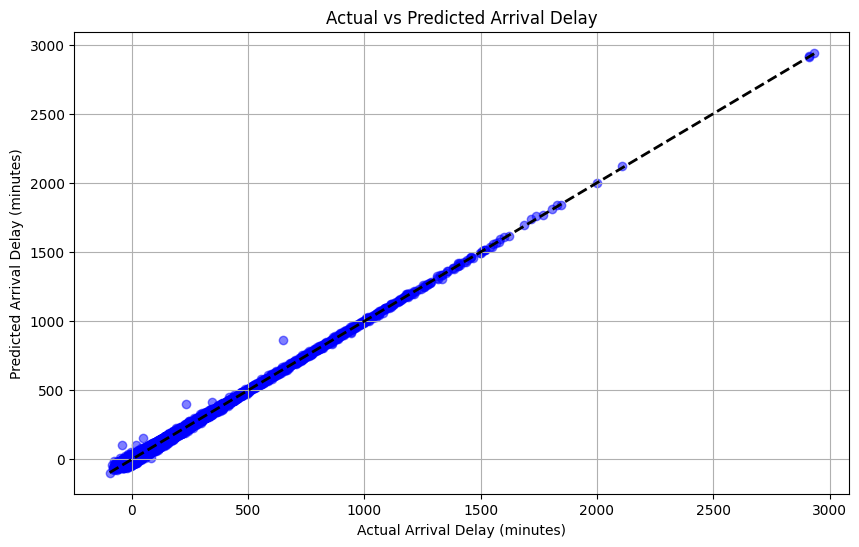

In [136]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Arrival Delay (minutes)')
plt.ylabel('Predicted Arrival Delay (minutes)')
plt.title('Actual vs Predicted Arrival Delay')
plt.grid(True)
plt.show()

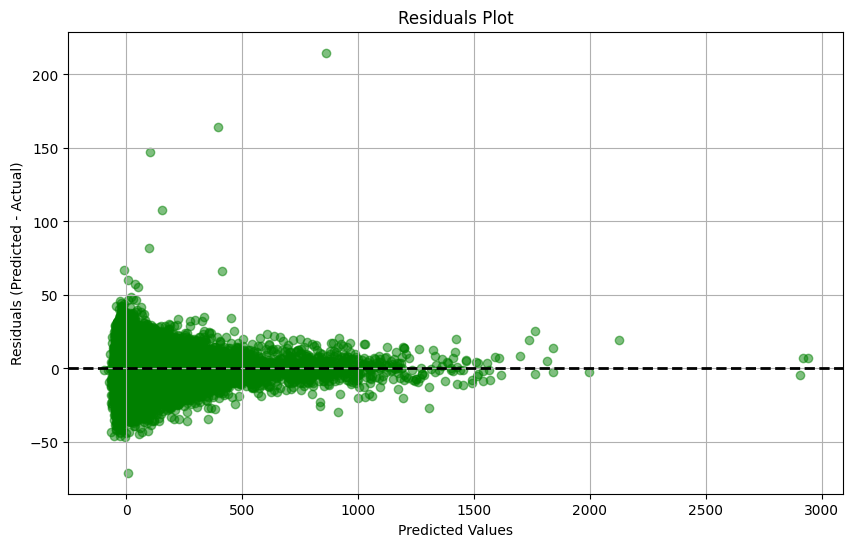

In [137]:
residuals = y_pred - y_test

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

In [135]:
input_data = {
    'ORIGIN': ['DAL'],
    'DEST': ['OKC'],
    'AIRLINE_CODE': ['WN'],
    'DEP_DELAY': [10.0],
    'TAXI_OUT': [15.0],
    'TAXI_IN': [141.0],
    'ELAPSED_TIME': [54.0],
    'DISTANCE': [181.0],
    'Day': [31]
}

input_df = pd.DataFrame(input_data)
predicted_arr_delay = pipeline.predict(input_df)

print(f'Predicted Arrival Delay: {predicted_arr_delay[0]} minutes')



Predicted Arrival Delay: 28.2599605967596 minutes
